In [1]:
import cymetric as cym
import glob
from cymetric import graphs
import pandas


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import sys
import argparse
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib import colors, ticker
import random

from pyDOE import lhs
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
%matplotlib inline

In [3]:
from cymetric import timeseries as tm

In [4]:
nuc_list_in = ["238pu", "239pu", "240pu", "241pu", "242pu", "241am"]

def get_ev(file):
    db = cym.dbopen(file)
    ev = cym.Evaluator(db)
    return ev


In [5]:
# Merthod to get all Cycle Fractions

def get_nuc_frac_boc(ev, nuc):
    df = tm.transactions(ev, receivers=['lwr'], nucs=[nuc] )
    df = df[df['Mass'] > 0 ]

    tot = tm.transactions(ev, receivers=['lwr'], nucs=nuc_list_in) 
    tot = tot[tot['Mass'] > 0 ]                

    df['Mass'] = df['Mass']/tot['Mass']
    return df.iloc[2]['Mass']

def get_pu_frac_boc(ev):
    df = tm.transactions(ev, receivers=['lwr'], nucs=nuc_list_in )
    df = df[df['Mass'] > 0 ]

    tot = tm.transactions(ev, receivers=['lwr']) 
    tot = tot[tot['Mass'] > 0 ]                

    df['Mass'] = df['Mass']/tot['Mass']
    return df.iloc[2]['Mass']

def boc_pu_compo(ev):
    compo = []
    for nuc in nuc_list_in:
        compo.append(get_nuc_frac_boc(ev, nuc))
    return compo

def get_pu_frac_eoc(ev):
    df = tm.transactions(ev, senders=['lwr'], nucs=nuc_list_in )
    df = df[df['Mass'] > 0 ]

    tot = tm.transactions(ev, senders=['lwr']) 
    tot = tot[tot['Mass'] > 0 ]                

    df['Mass'] = df['Mass']/tot['Mass']
    return df.iloc[2]['Mass']

In [6]:
# Get all Fractions

def get_intel(ev):
    tt = boc_pu_compo(ev) +  [get_pu_frac_boc(ev)] + [get_pu_frac_eoc(ev)]
    return tt

In [7]:
def pairgrid_heatmap(x, y, **kws):
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    plt.tricontour(x, y, df_frac, 100, levels=np.linspace(0.03,0.15,100), cmap=cmap, vmin=0.03, vmax=0.15, zorder=0, **kws)


def plot(df, filename,name_matrix):
    g = sns.PairGrid(df, vars=("238pu", "239pu", "240pu", "241pu", "242pu", "241am"))
    g.map_diag(sns.kdeplot)
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    g.map_upper(sns.kdeplot, cmap=cmap, n_levels=60, shade=True);
 
    g.map_lower(pairgrid_heatmap);
    cax = g.fig.add_axes([-.04, .1, .03, .8])
    plt.colorbar(cax=cax)

    g.savefig(filename)

In [8]:
def get_fraction(files):
    data =[]
    for i, file in enumerate(sorted(glob.glob(files))):
        if i%10 == 0:
            print(i, file)
        ev = get_ev(file)
        data.append(get_intel(ev))
        
    return data

In [25]:
data_fix = get_fraction("*_fix.h5")
data_pueq = get_fraction("*_pueq.h5")

0 0_fix.h5
10 109_fix.h5
20 118_fix.h5
30 127_fix.h5
40 136_fix.h5
50 145_fix.h5
60 154_fix.h5
70 163_fix.h5
80 172_fix.h5
90 181_fix.h5
100 190_fix.h5
110 19_fix.h5
120 208_fix.h5
130 217_fix.h5
140 226_fix.h5
150 235_fix.h5
160 244_fix.h5
170 253_fix.h5
180 262_fix.h5
190 271_fix.h5
200 280_fix.h5
210 28_fix.h5
220 299_fix.h5
230 307_fix.h5
240 316_fix.h5
250 325_fix.h5
260 334_fix.h5
270 343_fix.h5
280 352_fix.h5
290 361_fix.h5
300 370_fix.h5
310 37_fix.h5
320 389_fix.h5
330 398_fix.h5
340 406_fix.h5
350 415_fix.h5
360 424_fix.h5
370 433_fix.h5
380 442_fix.h5
390 451_fix.h5
400 460_fix.h5
410 46_fix.h5
420 479_fix.h5
430 488_fix.h5
440 497_fix.h5
450 505_fix.h5
460 514_fix.h5
470 523_fix.h5
480 532_fix.h5
490 541_fix.h5
500 550_fix.h5
510 55_fix.h5
520 569_fix.h5
530 578_fix.h5
540 587_fix.h5
550 596_fix.h5
560 604_fix.h5
570 613_fix.h5
580 622_fix.h5
590 631_fix.h5
600 640_fix.h5
610 64_fix.h5
620 659_fix.h5
630 668_fix.h5
640 677_fix.h5
650 686_fix.h5
660 695_fix.h5
670 703_fix.h5

In [26]:
print("toto")

toto


In [87]:
df_fix = pandas.DataFrame(data_fix)
name = nuc_list_in + ['Frac_BOC']+ ['Frac_EOC']
df_fix.columns = name

df_eq = pandas.DataFrame(data_pueq)
name = nuc_list_in + ['Frac_BOC']+ ['Frac_EOC']
df_eq.columns = name

In [88]:
df_fix.to_csv("fix.csv")
df_eq.to_csv("eq.csv")

In [89]:
df_fix = pd.DataFrame.from_csv("fix.cvs")
df_eq = pd.DataFrame.from_csv("eq.cvs")

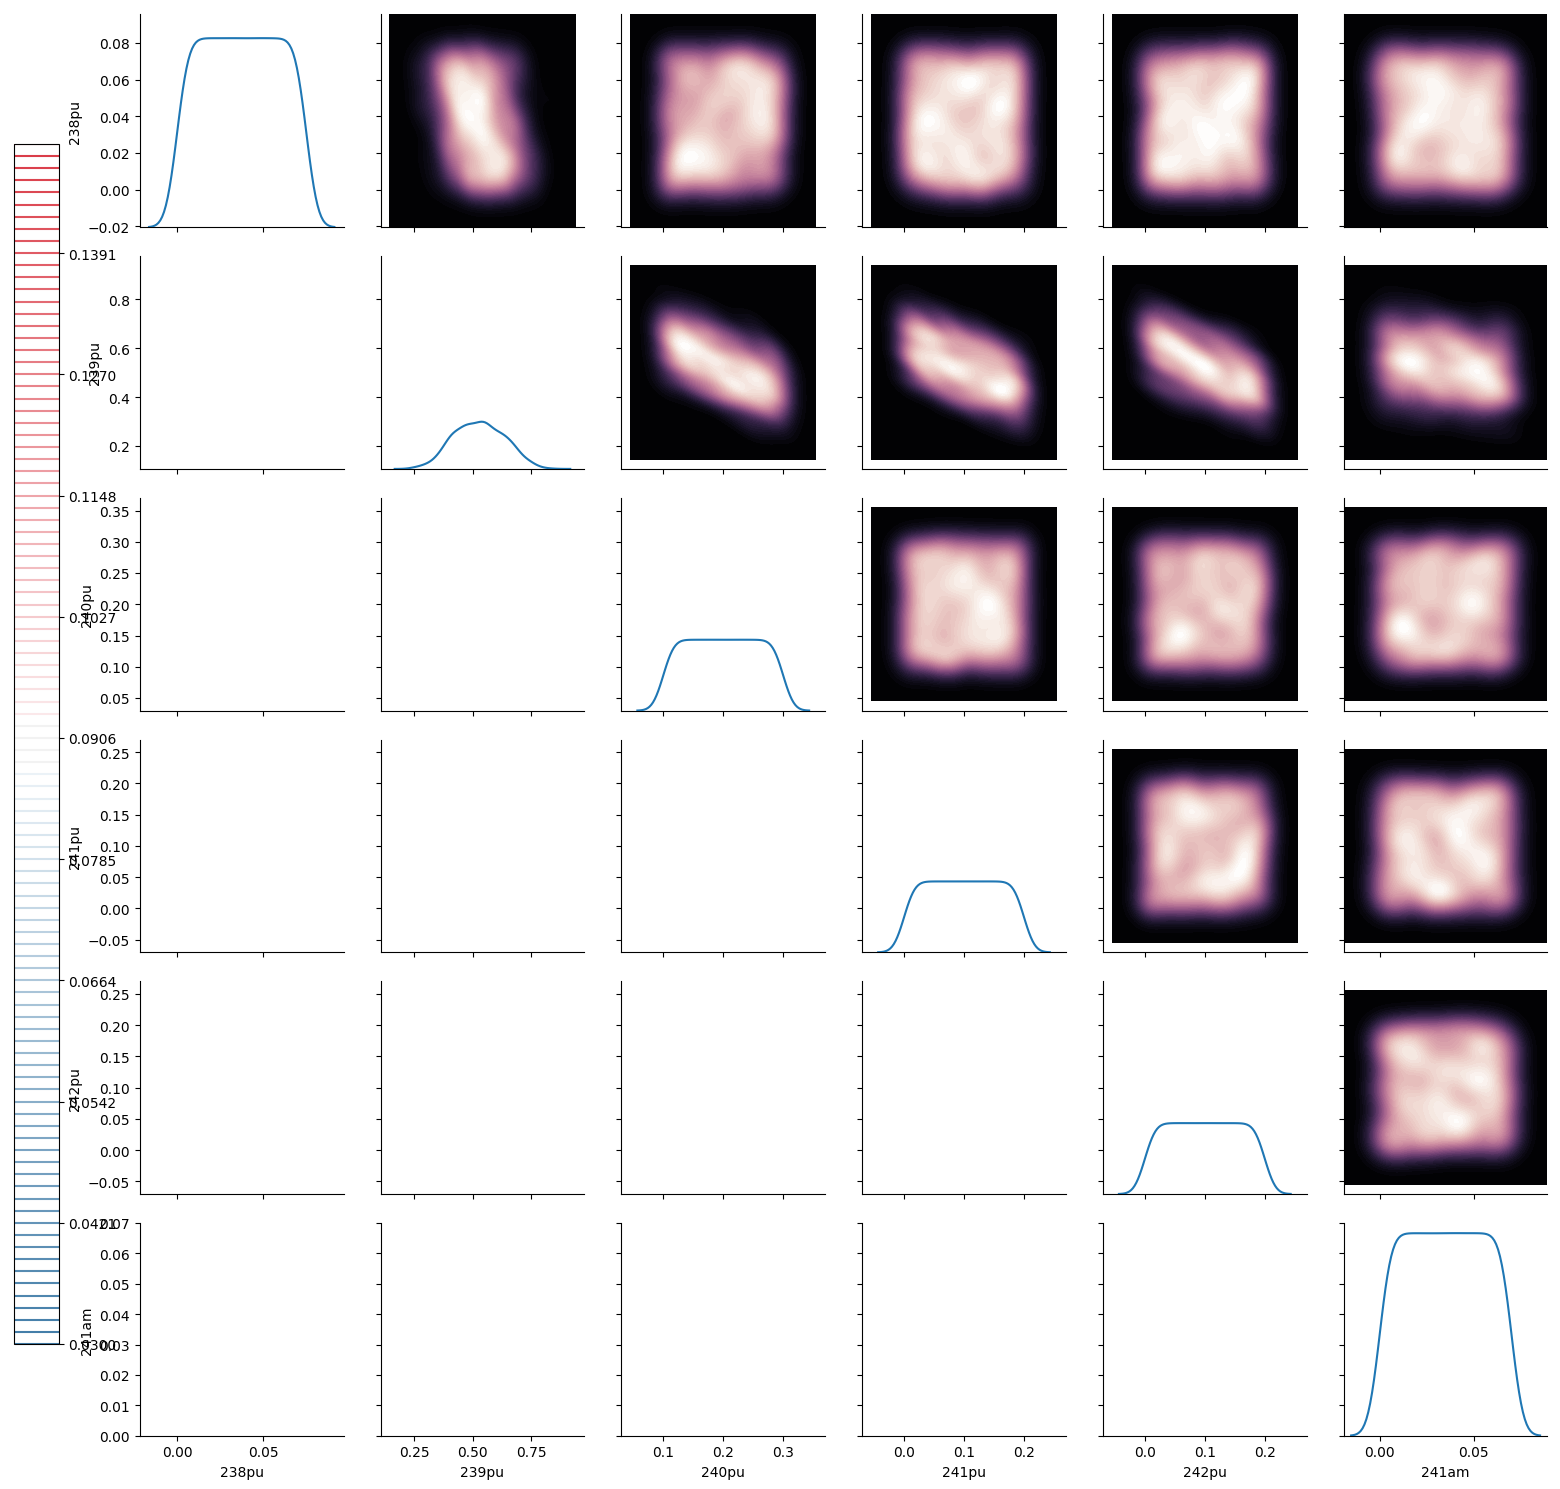

In [90]:
df_frac = df_fix['Frac_BOC']
plot(df_fix, "test.png", nuc_list_in)

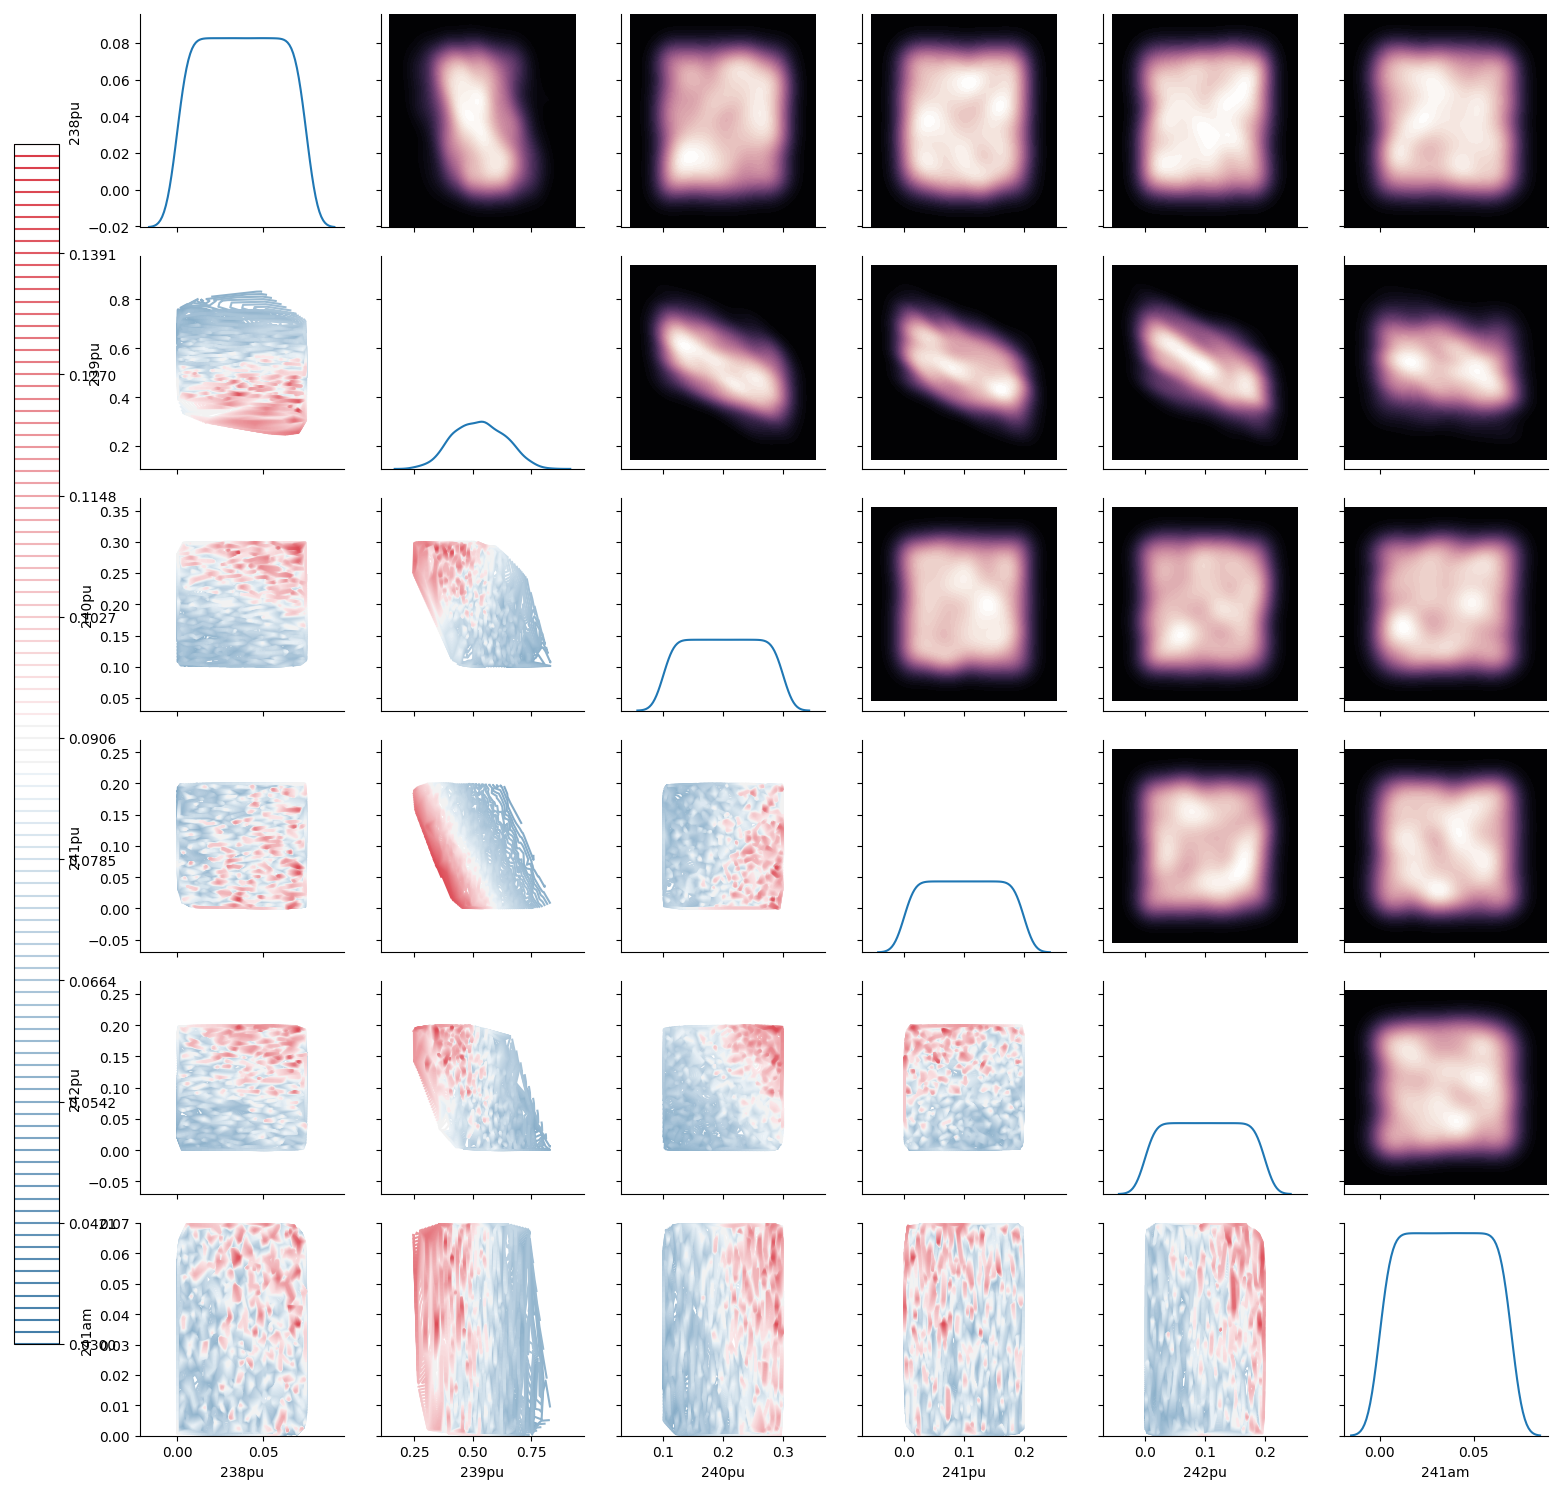

In [91]:
df_frac = df_eq['Frac_BOC']
plot(df_eq, "test.png", nuc_list_in)


In [35]:
df = df_fix.copy()
df['238pu'] = df_eq['238pu']
df['239pu'] = df_eq['239pu']
df['240pu'] = df_eq['240pu']
df['241pu'] = df_eq['241pu']
df['242pu'] = df_eq['242pu']
df['241am'] = df_eq['241am']
df = df.rename(index=str, columns={"Frac_BOC": "fix_Frac_BOC", "Frac_EOC": "fix_Frac_EOC"})
df = pd.merge(df_eq, df, on=nuc_list_in)
df = df.rename(index=str, columns={"Frac_BOC": "eq_Frac_BOC", "Frac_EOC": "eq_Frac_EOC"})


#df.drop(base_col[1], 1)


In [36]:
df

238pu     239pu     240pu     241pu     242pu     241am  eq_Frac_BOC  \
0    0.005726  0.521715  0.292817  0.131138  0.013695  0.034909     0.072617   
1    0.028566  0.559127  0.230929  0.068285  0.100144  0.012950     0.076741   
2    0.030147  0.543210  0.184449  0.155692  0.069407  0.017096     0.064189   
3    0.004548  0.563214  0.130511  0.132413  0.118487  0.050828     0.064512   
4    0.037347  0.693098  0.113977  0.029201  0.082391  0.043985     0.066188   
5    0.021114  0.613028  0.189564  0.020918  0.114406  0.040969     0.078215   
6    0.030477  0.339081  0.288200  0.186175  0.131683  0.024384     0.089964   
7    0.029063  0.438808  0.280679  0.072923  0.142228  0.036299     0.101867   
8    0.047138  0.435887  0.213402  0.083479  0.171791  0.048302     0.098942   
9    0.030433  0.371034  0.293640  0.076705  0.189242  0.038947     0.121365   
10   0.002890  0.636804  0.258408  0.009090  0.042912  0.049897     0.078843   
11   0.053583  0.708275  0.169785  0.007785  0.016678  0.043893     0.069916   
12   0.068409  0.370930  0.275133  0.153572  0.101577  0.030379     0.096001   
13   0.024873  0.404948  0.285523  0.102080  0.115711  0.066866     0.104231   
14   0.050077  0.635859  0.169359  0.006679  0.122873  0.015152     0.077108   
15   0.036432  0.463452  0.271216  0.077759  0.094614  0.056528     0.097375   
16   0.020893  0.469487  0.244360  0.182720  0.021285  0.061256     0.071678   
17   0.069176  0.401475  0.229499  0.114423  0.183124  0.002303     0.095370   
18   0.046986  0.607464  0.128205  0.027212  0.120758  0.069374     0.079585   
19   0.063140  0.583994  0.165437  0.006000  0.116494  0.064935     0.090717   
20   0.020023  0.497659  0.139816  0.120302  0.171106  0.051093     0.074790   
21   0.070894  0.495357  0.230615  0.080881  0.110866  0.011387     0.087044   
22   0.051200  0.519628  0.184343  0.032980  0.193843  0.018005     0.091270   
23   0.048815  0.657129  0.174803  0.050753  0.003084  0.065416     0.070310   
24   0.053135  0.390104  0.222223  0.185258  0.137315  0.011965     0.079774   
25   0.066724  0.583838  0.101762  0.141601  0.094322  0.011754     0.061732   
26   0.025360  0.359316  0.243058  0.121644  0.185649  0.064972     0.106424   
27   0.060582  0.597863  0.186642  0.115816  0.036291  0.002807     0.064833   
28   0.053727  0.503664  0.263812  0.094430  0.045455  0.038912     0.084867   
29   0.066805  0.375904  0.244624  0.162607  0.146550  0.003510     0.088322   
..        ...       ...       ...       ...       ...       ...          ...   
970  0.015518  0.599371  0.222889  0.028651  0.072117  0.061454     0.081026   
971  0.018860  0.507374  0.261153  0.117213  0.080312  0.015088     0.075365   
972  0.064602  0.528391  0.147256  0.134974  0.109115  0.015662     0.069314   
973  0.056180  0.672496  0.111248  0.076856  0.066993  0.016226     0.061529   
974  0.043311  0.353632  0.289757  0.155039  0.099308  0.058954     0.100827   
975  0.005983  0.390730  0.217747  0.194592  0.186650  0.004297     0.074161   
976  0.006841  0.567110  0.279128  0.102704  0.019616  0.024601     0.070791   
977  0.007114  0.597182  0.178053  0.148751  0.018667  0.050233     0.060551   
978  0.046179  0.541719  0.122682  0.066208  0.192929  0.030283     0.078375   
979  0.022760  0.639804  0.123446  0.052682  0.127125  0.034183     0.067435   
980  0.017232  0.366715  0.225994  0.136140  0.198354  0.055565     0.096912   
981  0.041749  0.560879  0.176611  0.190760  0.025817  0.004183     0.058302   
982  0.002614  0.562490  0.160955  0.062729  0.171809  0.039403     0.075196   
983  0.043630  0.439219  0.244051  0.154981  0.053767  0.064353     0.082695   
984  0.009939  0.628426  0.258650  0.026026  0.035399  0.041561     0.076708   
985  0.042992  0.466810  0.219673  0.040863  0.176979  0.052682     0.105758   
986  0.023840  0.526260  0.137898  0.161288  0.137444  0.013271     0.063556   
987  0.015744  0.658484  0.118808  0.038903  0.148427  0.019633     0.066176   
988  0.0

In [39]:
df['obs1'] =  (df['eq_Frac_BOC'] - df['fix_Frac_BOC'])/df['fix_Frac_BOC']

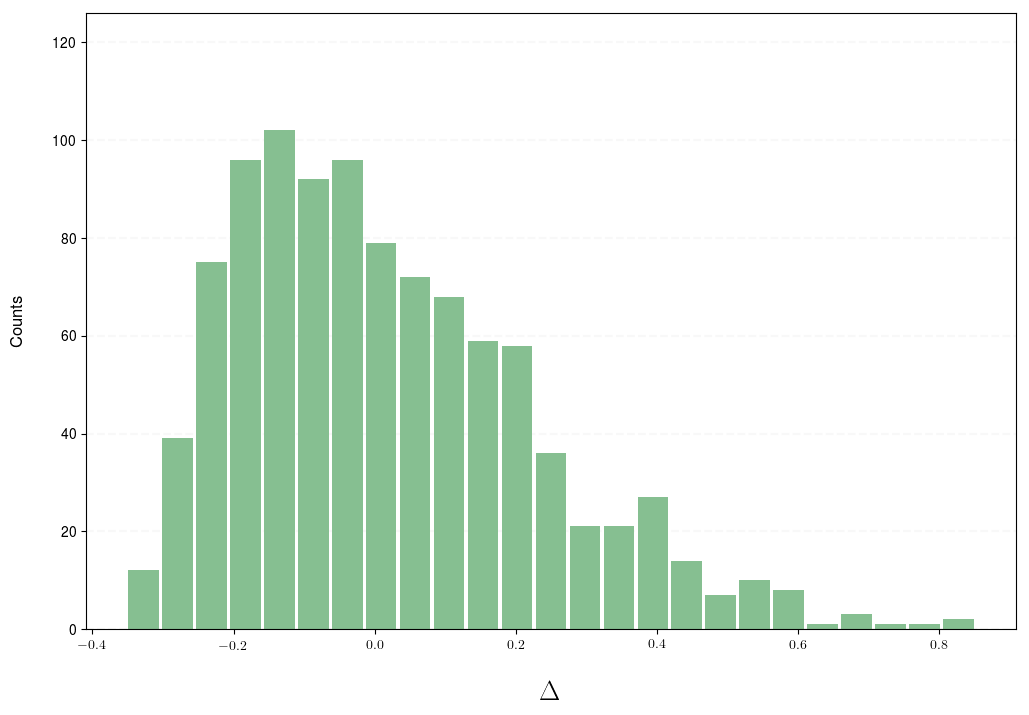

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
ax = df.hist(column='obs1', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(True)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(True)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel(r"$\Delta$", labelpad=20, weight='bold', size=20)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [47]:
df['obs2'] =  ((df['eq_Frac_BOC'] - df['eq_Frac_EOC'])/df['eq_Frac_BOC'] - (df['fix_Frac_BOC'] - df['fix_Frac_EOC'])/df['fix_Frac_BOC'])/((df['fix_Frac_BOC'] - df['fix_Frac_EOC'])/df['fix_Frac_BOC'])

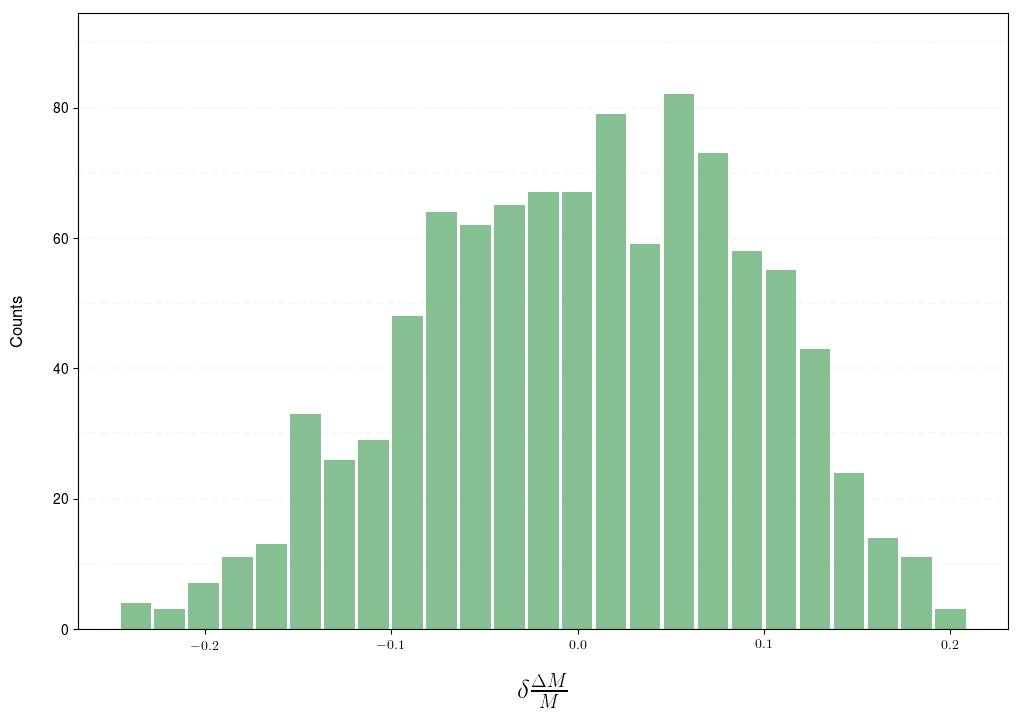

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
ax = df.hist(column='obs2', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(True)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(True)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel(r"$\delta\frac{\Delta M}{M}$", labelpad=20, weight='bold', size=20)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [46]:
df['obs3'] =  ( (df['eq_Frac_BOC'] - df['eq_Frac_EOC']) - (df['fix_Frac_BOC'] - df['fix_Frac_EOC']) ) / (df['fix_Frac_BOC'] - df['fix_Frac_EOC'])

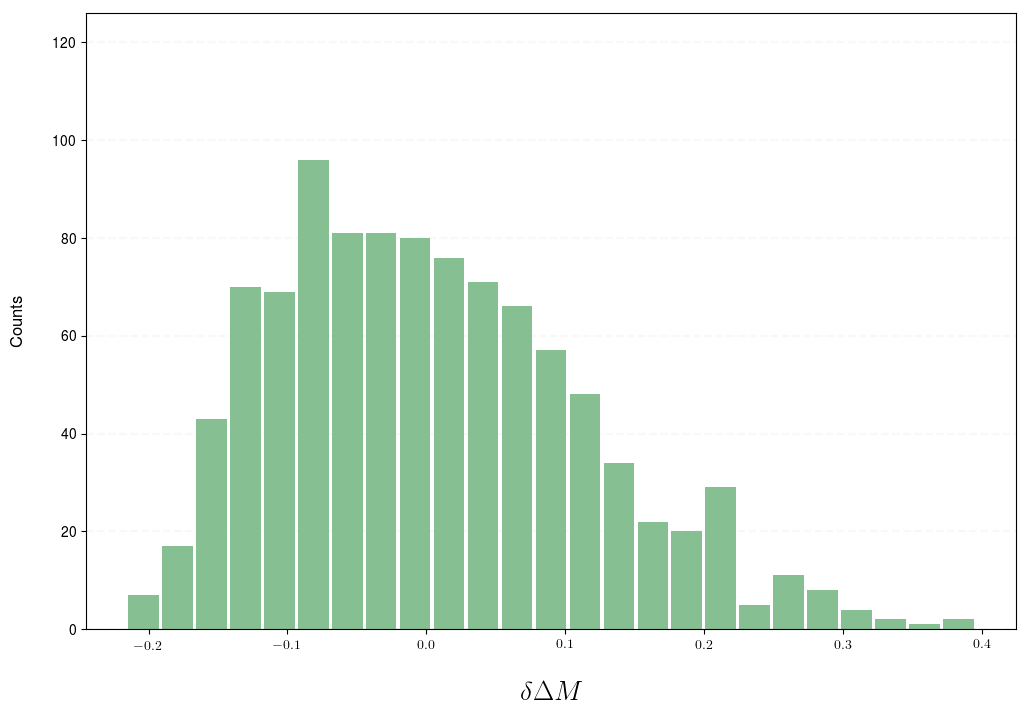

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
ax = df.hist(column='obs3', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(True)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(True)

    # Switch off ticks
    #x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel(r"$\delta\Delta M$", labelpad=20, weight='bold', size=20)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

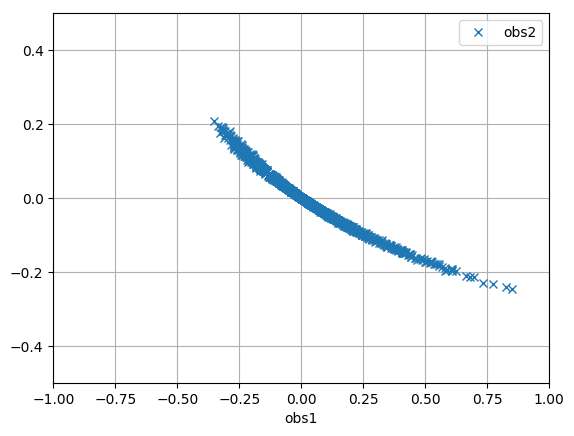

In [82]:
plt.rcParams.update(plt.rcParamsDefault)
df.plot(x='obs1', y='obs2', linestyle='', marker='x')
plt.ylim(-.5, 0.5)
plt.xlim(-1, 1)
plt.grid()

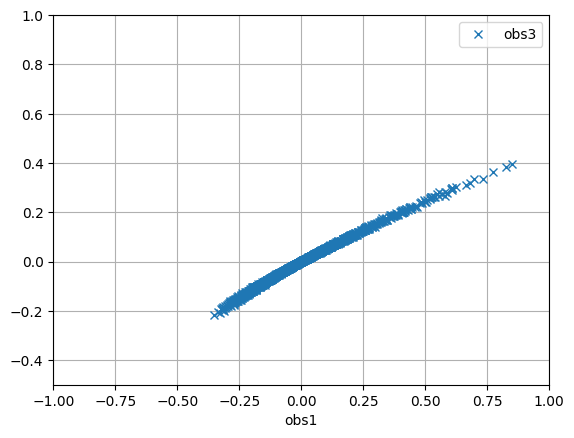

In [81]:
plt.rcParams.update(plt.rcParamsDefault)
df.plot(x='obs1', y='obs3', linestyle='', marker='x')
plt.ylim(-.5, 1)
plt.xlim(-1, 1)
plt.grid()

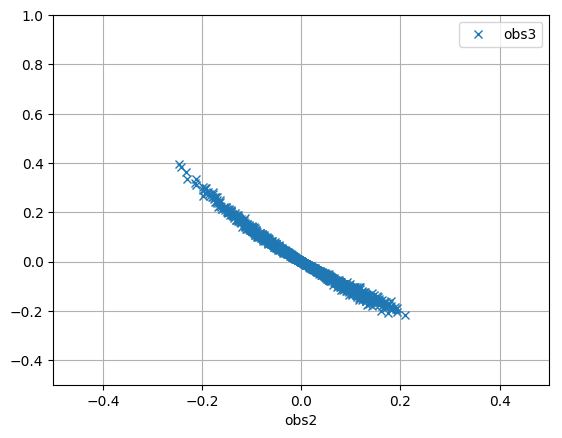

In [80]:
plt.rcParams.update(plt.rcParamsDefault)
df.plot(x='obs2', y='obs3', linestyle='', marker='x')
plt.ylim(-0.5, 1)
plt.xlim(-.5, 0.5)
plt.grid()

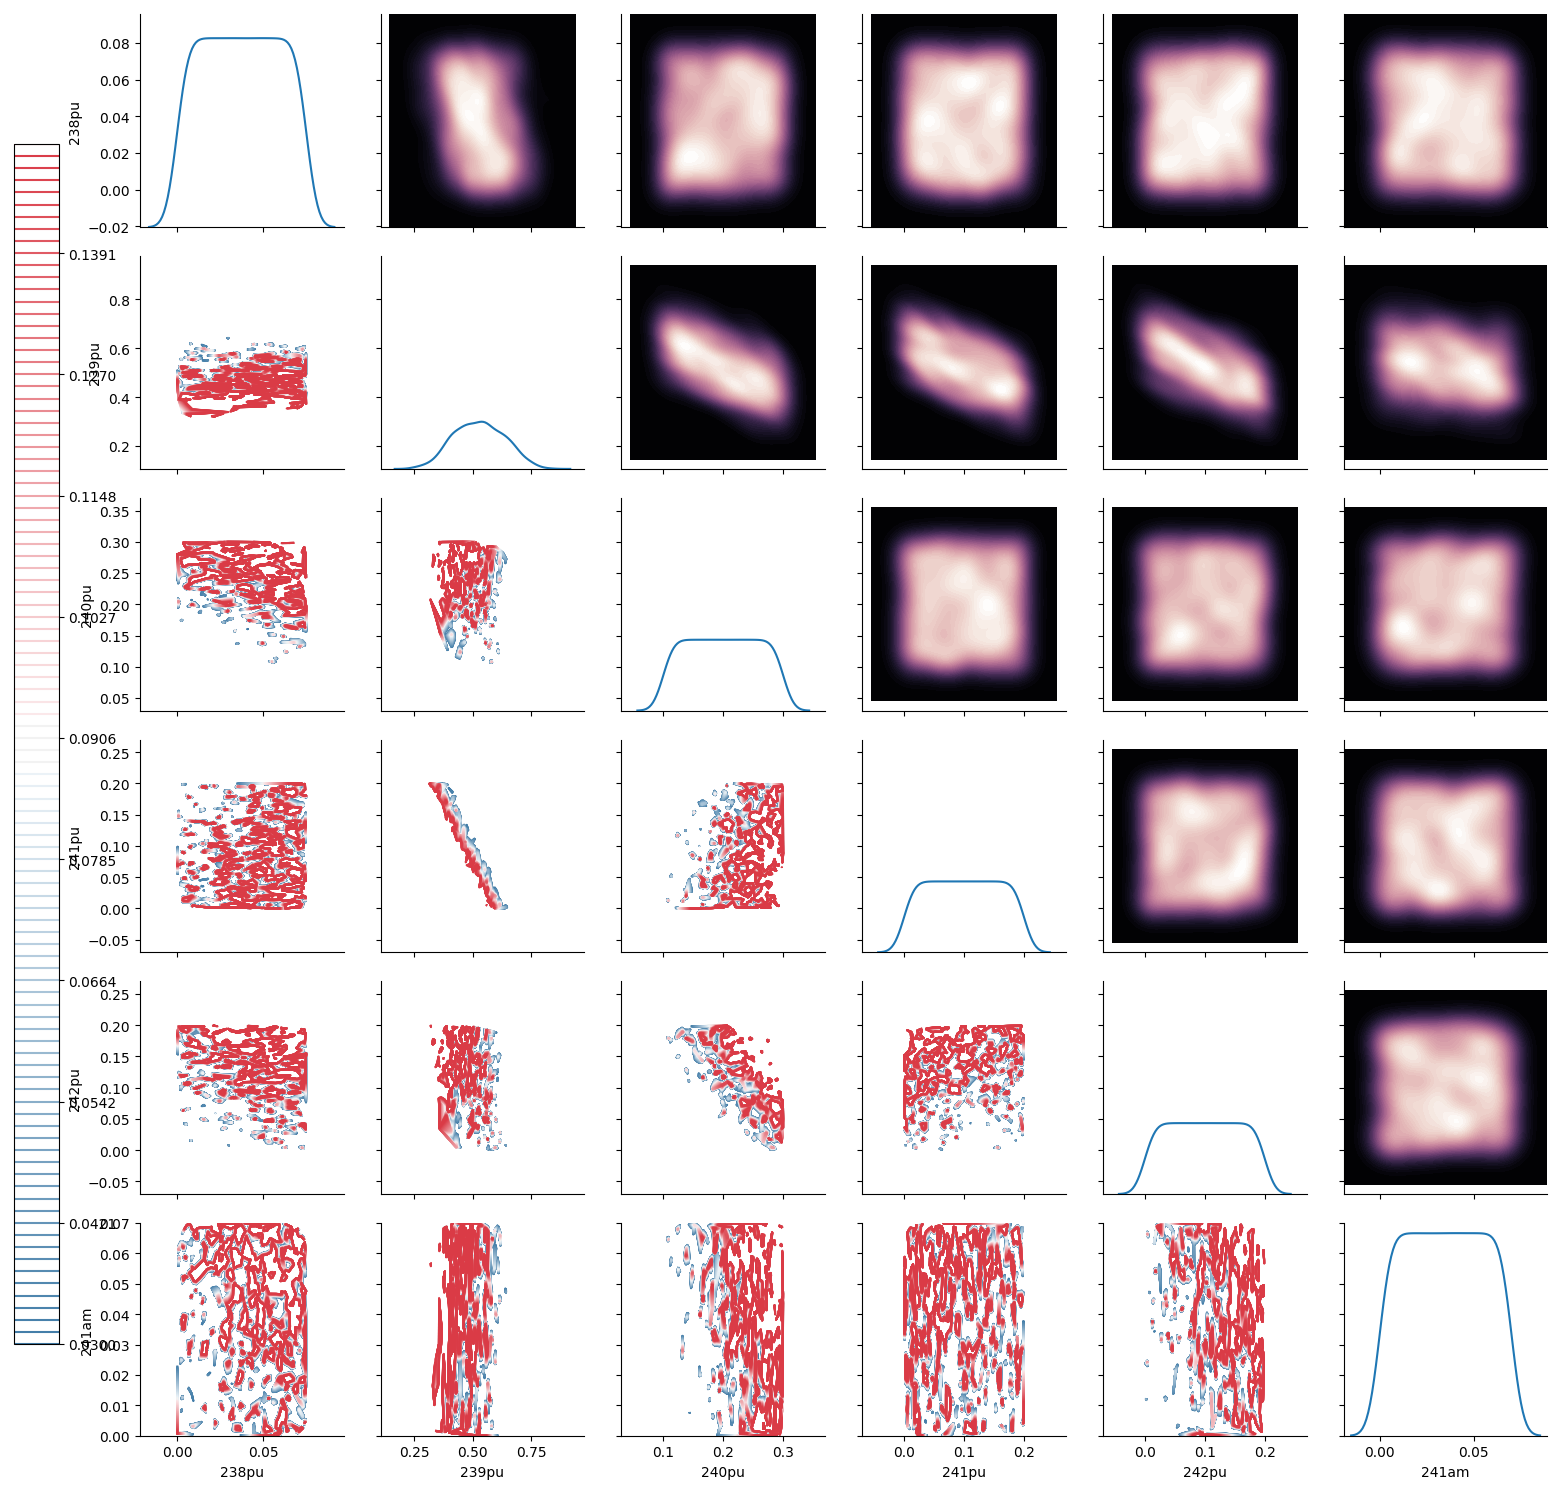

In [84]:
df_frac = df['obs1']
plot(df, "obs1.png", nuc_list_in)

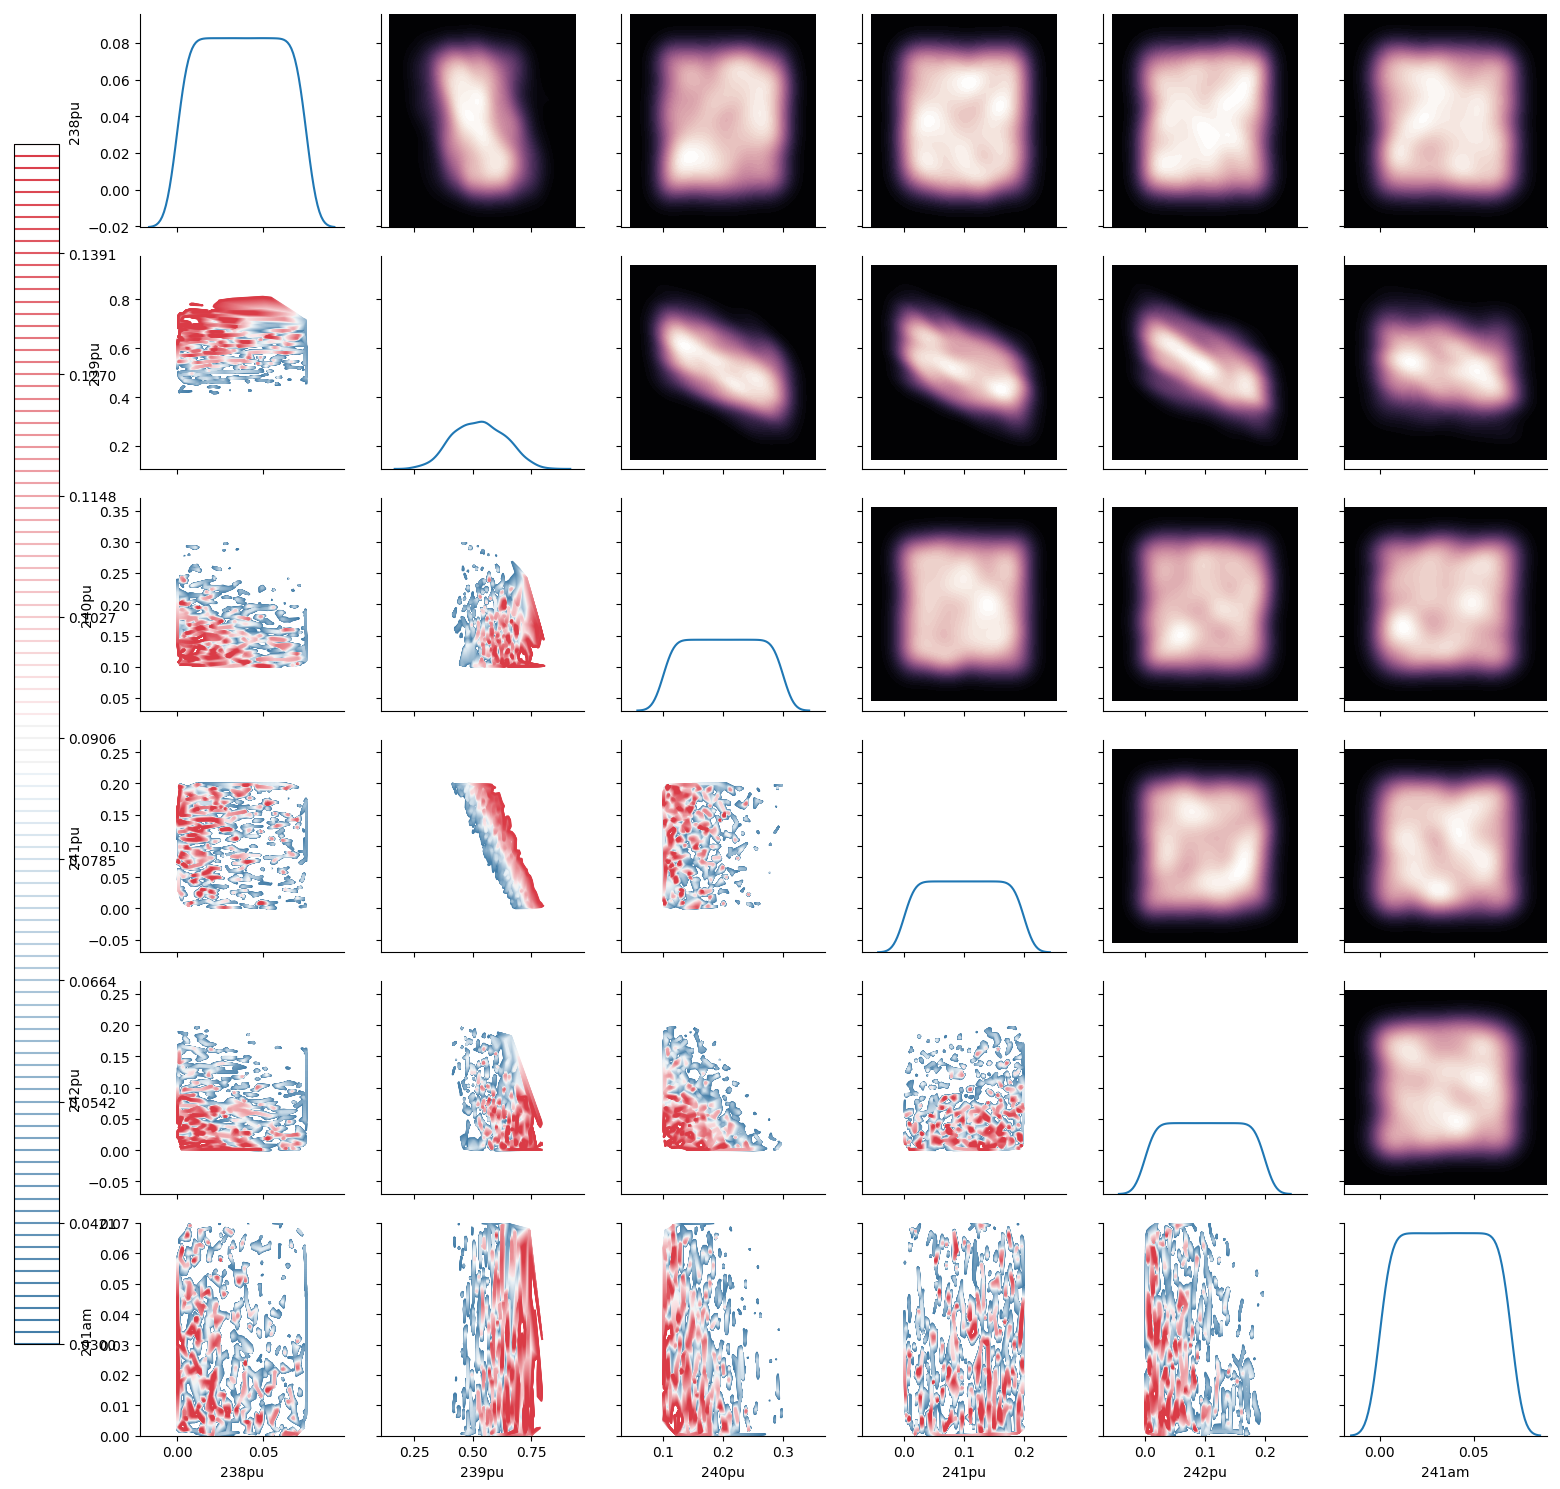

In [85]:
df_frac = df['obs2']
plot(df, "obs2.png", nuc_list_in)

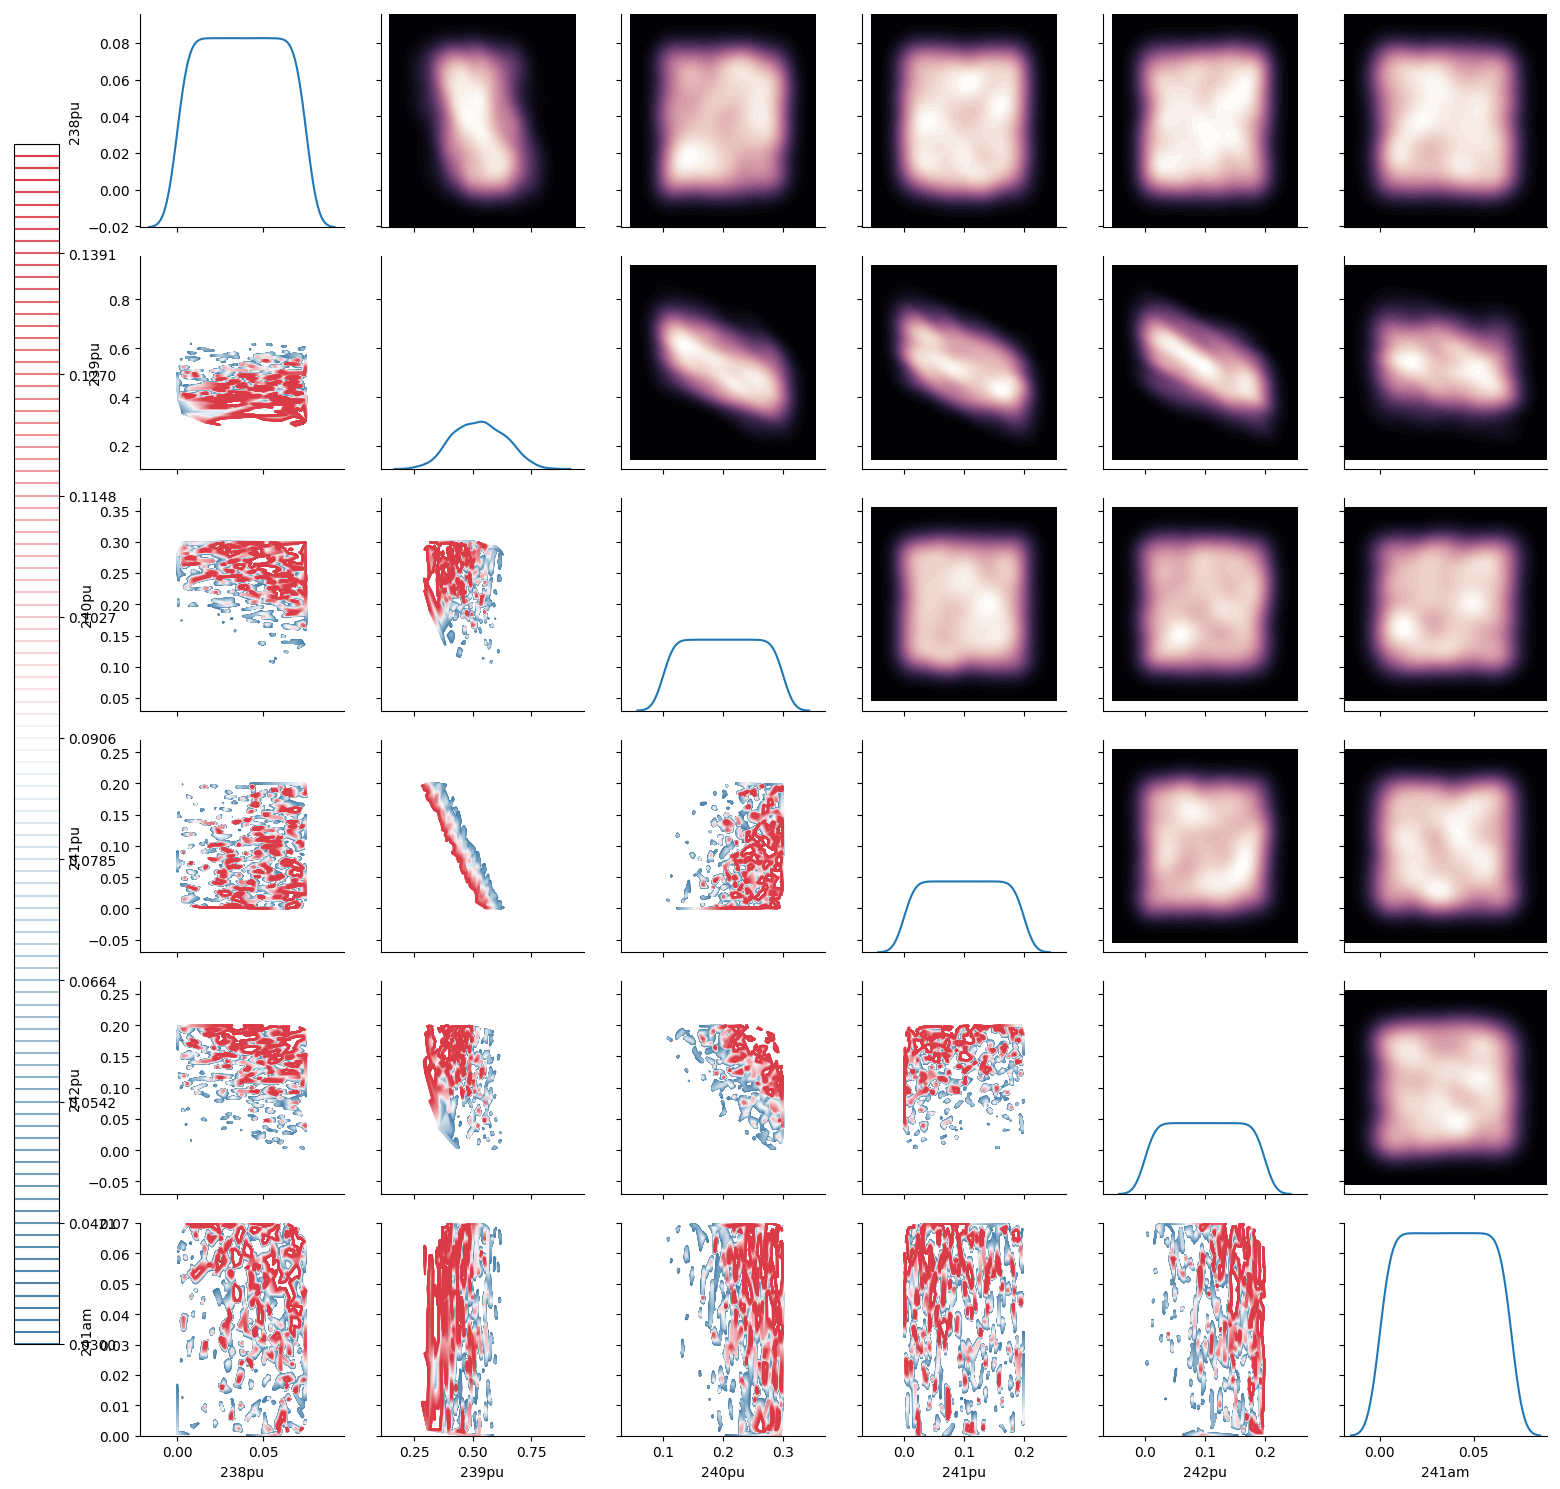

In [86]:
df_frac = df['obs3']
plot(df, "obs3.png", nuc_list_in)